In [139]:
import random
import time

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd

In [140]:
red = [1, 3, 5, 7, 9, 12,
14, 16, 18, 19, 21, 23,
25, 27, 30, 32, 34, 36]

black = [2, 4, 6, 8, 10, 11,
13, 15, 17, 20, 22, 24,
26, 28, 29, 31, 33, 35]

number_order = [0,32,15,19,4,21,2,25,17,34,6,27,13,36,11,30,8,
                23,10,5,24,16,33,1,20,14,31,9,22,18,29,7,28,12,35,3,26]
odds = {
    4:8,
    6:5,
    3:11    
} 
    
def roulette():    
    win = random.randint(0,36)
    #time.sleep(2)   
    return win

def play(bets):
    lucky_number = roulette()
    winnings = 0
    for b in bets:        
        if lucky_number in b['numbers']:
            current_odds = len(b['numbers'])
            #print(current_odds)
            winnings = current_odds*b['bet'] + winnings
        else:
            winnings = winnings - b['bet'] 

    return winnings, lucky_number


![roulette table](http://www.roulette-games.com/images/european_roulette_layout.gif)
![roulette wheel](http://4.bp.blogspot.com/-jIYMvH05cJc/UHVwl39lrOI/AAAAAAAAL20/UNc_ufRUB90/s1600/european+roulette+wheel.png)

In [196]:
funds = 1600
winning_numbers_list = []

# this one loses money
#bets = [{'bet':20,'numbers':[4,5,8,7]},
#        {'bet':20,'numbers':[25,26,28,29]},
#        {'bet':20,'numbers':[11,12,14,15]},        
#        {'bet':20,'numbers':[16,17,19,20]}]

# this one wins money - sometimes 

bets = [{'bet':20,'numbers':[4,5,6,9,8,7]},
        {'bet':20,'numbers':[25,26,27,28,29,30]},
        {'bet':20,'numbers':[10,11,12,13,14,15]},
        {'bet':20,'numbers':[31,32,33,34,35,36]}]


total_winnings = []
for i in range(0,1000):
    chips = funds
    for i in range(0, funds/80):
        winnings, lucky_number = play(bets)
        chips = chips + winnings
        winning_numbers_list.append(lucky_number)
    total_winnings.append(chips)



<Container object of 1000 artists>

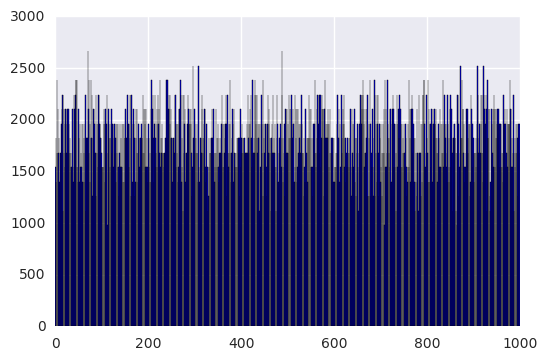

In [197]:
y = total_winnings
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")

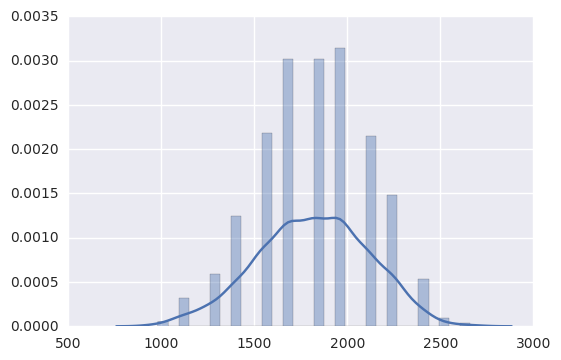

In [198]:
# distribution
sns.distplot(total_winnings);

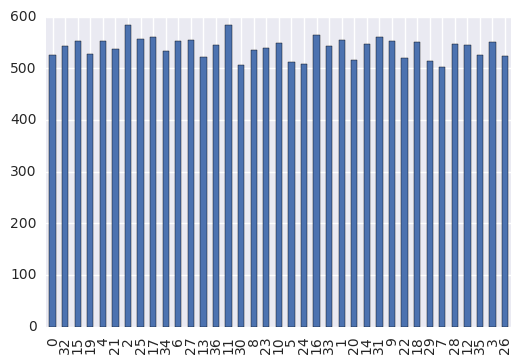

In [199]:
# distribution

c = Counter(winning_numbers_list)
#sns.distplot(winning_numbers_list);
s = pd.Series(winning_numbers_list)
vc = s.value_counts()
# re arrange according to wheel layout
vc = pd.Series(vc,index = number_order)
vc.plot(kind='bar')